# Gaming Customer Segmentation
## Revenue Prediction Using Rule-Based Classification

---

## Project Overview

This project analyzes customer data from a gaming company to:
- Understand customer spending patterns
- Create customer segments based on demographics
- Predict revenue from new users
- Develop targeted marketing strategies

### Dataset
- **5,000 transactions** from international gaming company
- **5 variables**: PRICE, SOURCE, SEX, COUNTRY, AGE
- **6 countries**: USA, Brazil (BRA), Germany (DEU), Turkey (TUR), France (FRA), Canada (CAN)
- **Note**: Same customer can appear multiple times (multiple purchases)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load data
df = pd.read_csv('persona.csv')

print(f"Data loaded successfully!")
print(f"Dataset size: {df.shape[0]} rows × {df.shape[1]} columns")

Data loaded successfully!
Dataset size: 5000 rows × 5 columns


---
# TASK 1: Exploratory Data Analysis

Let's answer the 10 questions to understand our data better.

### Question 1: Read persona.csv and show general information

In [3]:
# First 5 rows
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "-"*50)

# Dataset shape
print(f"\nDataset shape: {df.shape}")
print(f"Total transactions: {df.shape[0]}")
print(f"Total variables: {df.shape[1]}")

First 5 rows of the dataset:
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17

--------------------------------------------------

Dataset shape: (5000, 5)
Total transactions: 5000
Total variables: 5


In [4]:
# Data types and missing values
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB
None


In [5]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe().T)


Statistical Summary:
        count  mean   std   min   25%   50%   75%   max
PRICE 5000.00 34.13 12.46  9.00 29.00 39.00 39.00 59.00
AGE   5000.00 23.58  9.00 15.00 17.00 21.00 27.00 66.00


**Key Findings:**
- No missing values in any column.
- Price ranges from 9 USD to 59 USD
- Average spending: $34.13
- Customer ages range from 15 to 66 years
- Average age: 23.58 years

### Question 2: How many unique SOURCE are there? What are their frequencies?

In [6]:
print("Unique SOURCE count:", df['SOURCE'].nunique())
print("\nSOURCE frequencies:")
print(df['SOURCE'].value_counts())
print("\nSOURCE percentages:")
print(df['SOURCE'].value_counts(normalize=True) * 100)

Unique SOURCE count: 2

SOURCE frequencies:
SOURCE
android    2974
ios        2026
Name: count, dtype: int64

SOURCE percentages:
SOURCE
android   59.48
ios       40.52
Name: proportion, dtype: float64


**Finding:** Android has 59.5% of transactions, while iOS accounts for 40.5%. More balanced than expected!

### Question 3: How many unique PRICE values are there?

In [7]:
print("Number of unique prices:", df['PRICE'].nunique()) #Count how many different values exist
print("\nUnique price values:")
print(sorted(df['PRICE'].unique()))

Number of unique prices: 6

Unique price values:
[np.int64(9), np.int64(19), np.int64(29), np.int64(39), np.int64(49), np.int64(59)]


**Finding:** There are 6 different price points (9, 19, 29, 39, 49, 59).

### Question 4: How many sales from each PRICE?

In [8]:
print("Sales count by price:")
print(df['PRICE'].value_counts().sort_index())

Sales count by price:
PRICE
9      200
19     992
29    1305
39    1260
49    1031
59     212
Name: count, dtype: int64


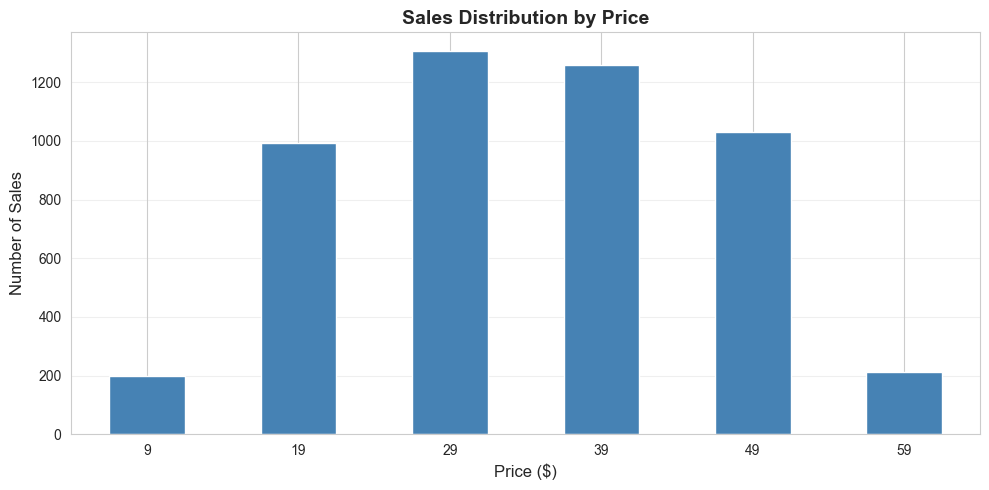

In [9]:
# Visualization
plt.figure(figsize=(10, 5))
df['PRICE'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Sales Distribution by Price', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Finding:** The 29 USD price point is most popular with 1305 sales. Prices 39 USD, and 49 USD account for the majority of sales.

### Question 5: How many sales from each country?

In [10]:
print("Sales count by country:")
country_sales = df['COUNTRY'].value_counts()
print(country_sales)

print("\nSales percentage by country:")
print((country_sales / len(df) * 100).round(2)) #more flexible when variable already exists

Sales count by country:
COUNTRY
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: count, dtype: int64

Sales percentage by country:
COUNTRY
usa   41.30
bra   29.92
deu    9.10
tur    9.02
fra    6.06
can    4.60
Name: count, dtype: float64


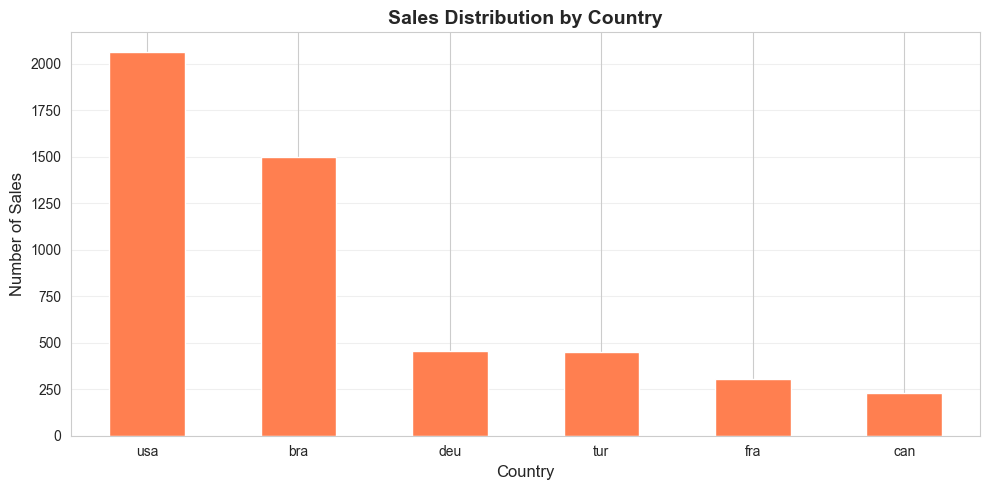

In [11]:
# Visualization
plt.figure(figsize=(10, 5))
country_sales.plot(kind='bar', color='coral')
plt.title('Sales Distribution by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Finding:** USA leads with 2,065 sales (41.3%), followed by Brazil (1,496, 29.9%). USA and Brazil together account for over 70% of all transactions.

### Question 6: How much total revenue from each country?

In [12]:
print("Total revenue by country:")
country_revenue = df.groupby('COUNTRY')['PRICE'].sum().sort_values(ascending=False)
print(country_revenue)

print("\nRevenue percentage by country:")
print((country_revenue / country_revenue.sum() * 100).round(2))

Total revenue by country:
COUNTRY
usa    70225
bra    51354
tur    15689
deu    15485
fra    10177
can     7730
Name: PRICE, dtype: int64

Revenue percentage by country:
COUNTRY
usa   41.15
bra   30.09
tur    9.19
deu    9.07
fra    5.96
can    4.53
Name: PRICE, dtype: float64


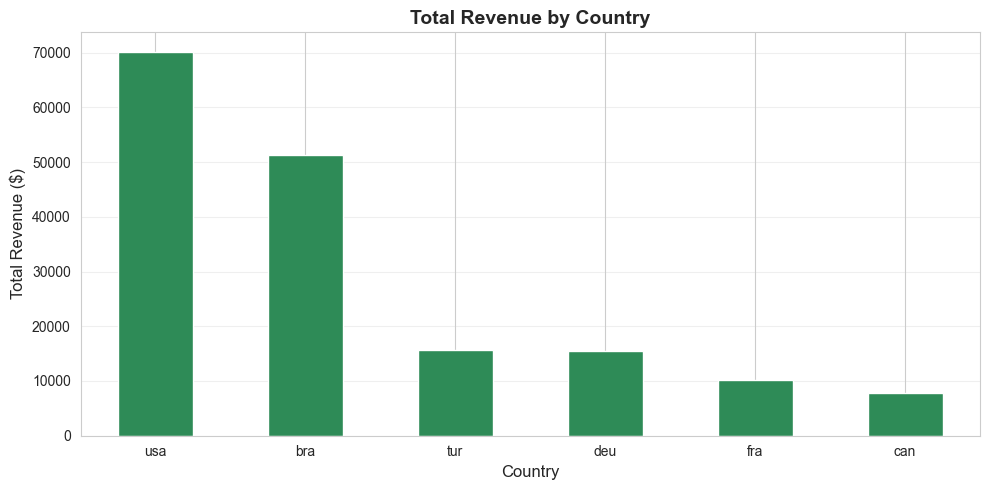

In [13]:
# Visualization
plt.figure(figsize=(10, 5))
country_revenue.plot(kind='bar', color='seagreen')
plt.title('Total Revenue by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Finding:** USA generates the highest revenue with 70,225 USD (41.2%), followed by Brazil with 51,354 USD (30.1%). These two countries account for over 71% of total revenue.

### Question 7: What are the sales numbers by SOURCE type?

In [14]:
print("Sales count by platform:")
print(df['SOURCE'].value_counts())
print(100 * df["SOURCE"].value_counts() / len(df))

Sales count by platform:
SOURCE
android    2974
ios        2026
Name: count, dtype: int64
SOURCE
android   59.48
ios       40.52
Name: count, dtype: float64


**Finding:** Android has 1.5x more transactions than iOS (2,974 vs 2,026). More balanced distribution.

### Question 8: What are the average PRICE by country?

In [15]:
print("Average price by country:")
avg_by_country = df.groupby('COUNTRY')['PRICE'].mean().sort_values(ascending=False)
print(avg_by_country)

Average price by country:
COUNTRY
tur   34.79
bra   34.33
deu   34.03
usa   34.01
can   33.61
fra   33.59
Name: PRICE, dtype: float64


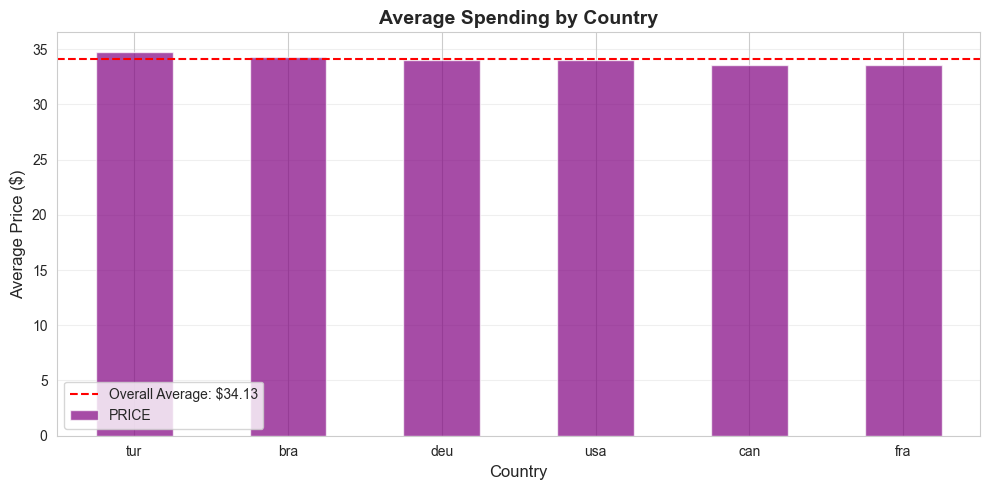

In [16]:
# Visualization
plt.figure(figsize=(10, 5))
avg_by_country.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Spending by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=0)
plt.axhline(y=df['PRICE'].mean(), color='red', linestyle='--', label=f'Overall Average: ${df["PRICE"].mean():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Finding:** Turkey highest (34.79), France lowest (33.59)
All countries within $1.20 range - very similar!

### Question 9: What are the average PRICE by SOURCE?

In [17]:
print("Average price by platform:")
avg_by_source = df.groupby('SOURCE')['PRICE'].mean().sort_values(ascending=False)
print(avg_by_source)

print("\nDifference:")
diff = avg_by_source['ios'] - avg_by_source['android']
print(f"iOS users spend ${diff:.2f} more on average")
print(f"That's {(diff/avg_by_source['android']*100):.2f}% higher than Android")

Average price by platform:
SOURCE
android   34.17
ios       34.07
Name: PRICE, dtype: float64

Difference:
iOS users spend $-0.11 more on average
That's -0.31% higher than Android


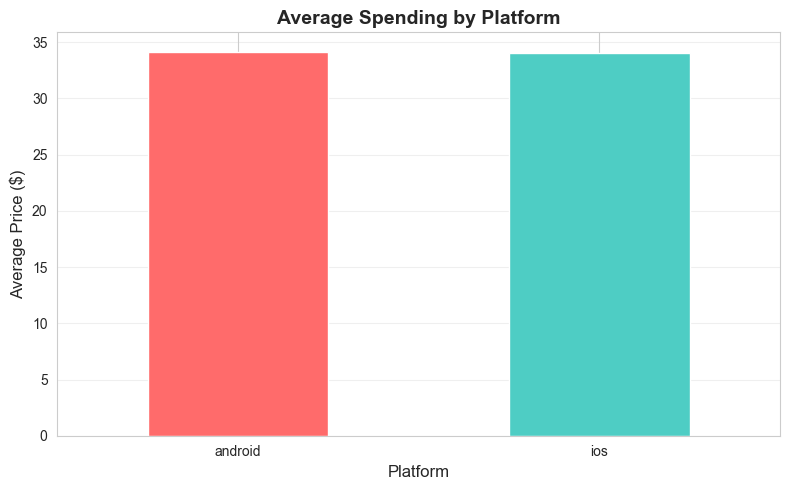

In [18]:
# Visualization
plt.figure(figsize=(8, 5))
avg_by_source.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Average Spending by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Finding:** Android 34.17, iOS 34.07. Platforms are essentially equal in spending (0.3% difference)

### Question 10: What are the average PRICE in COUNTRY-SOURCE breakdown?

In [21]:
print("Average price by country and platform:")
pivot = df.pivot_table(values='PRICE', index='COUNTRY', columns='SOURCE', aggfunc='mean')
print(pivot)

Average price by country and platform:
SOURCE   android   ios
COUNTRY               
bra        34.39 34.22
can        33.33 33.95
deu        33.87 34.27
fra        34.31 32.78
tur        36.23 33.27
usa        33.76 34.37


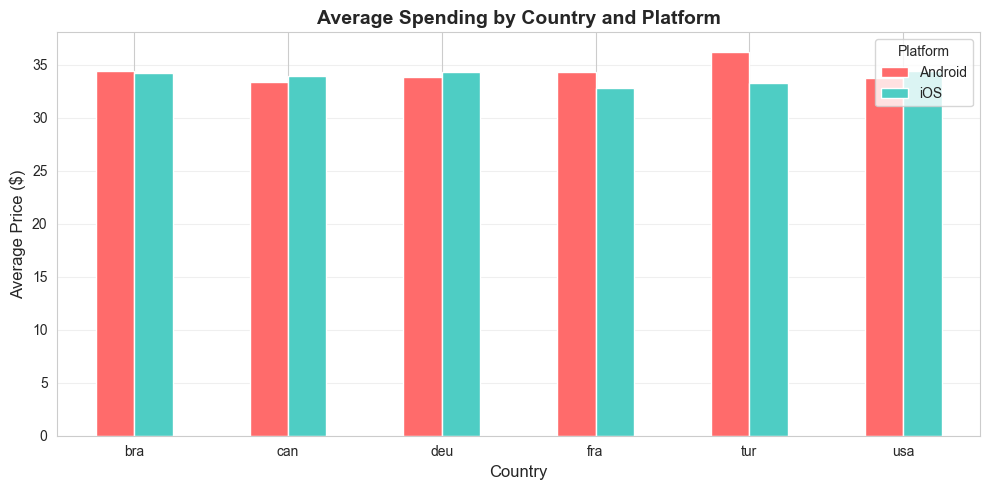

In [22]:
# Visualization
pivot.plot(kind='bar', figsize=(10, 5), color=['#FF6B6B', '#4ECDC4'])
plt.title('Average Spending by Country and Platform', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.legend(title='Platform', labels=['Android', 'iOS'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Finding:** Platform spending varies by country. Android spends more in Brazil, France, and Turkey, while iOS spends more in Canada, Germany, and USA. Biggest difference: Turkey (Android +$2.96).

---
# TASK 2: Average Revenue by Customer Segments

Breaking down by COUNTRY, SOURCE, SEX, and AGE to find patterns.

In [23]:
# Group by all demographic variables
agg_df = df.groupby(['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({'PRICE': 'mean'})

print("Average revenue by customer segments:")
print(agg_df.head(10))

Average revenue by customer segments:
                            PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android female 15   38.71
                       16   35.94
                       17   35.67
                       18   32.26
                       19   35.21
                       20   31.00
                       21   37.29
                       22   34.95
                       23   31.94
                       24   36.50


Pandas hides repeated index values for cleaner display - not an error, just formatting

**Finding:** We now have average spending for each unique combination of demographics. This will help us create personas.

---
# TASK 3: Sort by PRICE

Let's see which segments spend the most.

In [24]:
# Sort by price (descending)
agg_df = agg_df.sort_values('PRICE', ascending=False)

print("Top 10 highest spending segments:")
print(agg_df.head(10))

print("\nBottom 10 lowest spending segments:")
print(agg_df.tail(10))

Top 10 highest spending segments:
                            PRICE
COUNTRY SOURCE  SEX    AGE       
usa     android male   36   59.00
bra     android male   46   59.00
fra     android female 24   59.00
usa     ios     male   32   54.00
deu     android female 36   49.00
                       51   49.00
fra     ios     male   20   49.00
usa     android female 47   49.00
deu     ios     male   20   49.00
usa     ios     male   59   46.50

Bottom 10 lowest spending segments:
                            PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   23   21.50
tur     android male   21   19.00
bra     ios     female 34   19.00
tur     ios     male   47   19.00
fra     android male   18   19.00
bra     ios     male   47   19.00
usa     ios     female 30   19.00
can     android female 27   19.00
usa     ios     female 38   19.00
deu     android male   26    9.00


**Finding:** We can see which demographic combinations are most and least valuable.

---
# TASK 4: Convert Index to Columns

Making the data easier to work with.

In [25]:
# Reset index to convert it to regular columns
agg_df = agg_df.reset_index()

print("Data with regular columns:")
print(agg_df.head())
print(f"\nShape: {agg_df.shape}")

Data with regular columns:
  COUNTRY   SOURCE     SEX  AGE  PRICE
0     usa  android    male   36  59.00
1     bra  android    male   46  59.00
2     fra  android  female   24  59.00
3     usa      ios    male   32  54.00
4     deu  android  female   36  49.00

Shape: (348, 5)


*Finding* : Shape dropped from 5,000 to 348 because groupby combined duplicate demographic combinations and calculated average - this is correct and expected

---
# TASK 5: Convert AGE to Categories

Creating age groups for better segmentation.

In [26]:
# Check age distribution first
print("Age distribution:")
print(f"Min age: {agg_df['AGE'].min()}")
print(f"Max age: {agg_df['AGE'].max()}")
print(f"Mean age: {agg_df['AGE'].mean():.1f}")

Age distribution:
Min age: 15
Max age: 66
Mean age: 28.3


In [27]:
# Create age categories
bins = [0, 18, 23, 30, 40, agg_df['AGE'].max()]
labels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(int(agg_df['AGE'].max()))]

agg_df['age_cat'] = pd.cut(agg_df['AGE'], bins=bins, labels=labels)

print("Age categories created!")
print("\nAge category distribution:")
print(agg_df['age_cat'].value_counts().sort_index())

Age categories created!

Age category distribution:
age_cat
0_18     77
19_23    71
24_30    78
31_40    65
41_66    57
Name: count, dtype: int64


In [28]:
# Show sample with age categories
print("\nSample data with age categories:")
print(agg_df[['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'age_cat', 'PRICE']].head(10))


Sample data with age categories:
  COUNTRY   SOURCE     SEX  AGE age_cat  PRICE
0     usa  android    male   36   31_40  59.00
1     bra  android    male   46   41_66  59.00
2     fra  android  female   24   24_30  59.00
3     usa      ios    male   32   31_40  54.00
4     deu  android  female   36   31_40  49.00
5     deu  android  female   51   41_66  49.00
6     fra      ios    male   20   19_23  49.00
7     usa  android  female   47   41_66  49.00
8     deu      ios    male   20   19_23  49.00
9     usa      ios    male   59   41_66  46.50


In [29]:
# Analyze spending by age group
print("Average spending by age group:")
age_spending = df.copy()
age_spending['age_cat'] = pd.cut(age_spending['AGE'], bins=bins, labels=labels)
age_avg = age_spending.groupby('age_cat')['PRICE'].mean().sort_values(ascending=False)
print(age_avg)

Average spending by age group:
age_cat
41_66   34.48
0_18    34.34
19_23   34.31
24_30   33.72
31_40   33.51
Name: PRICE, dtype: float64


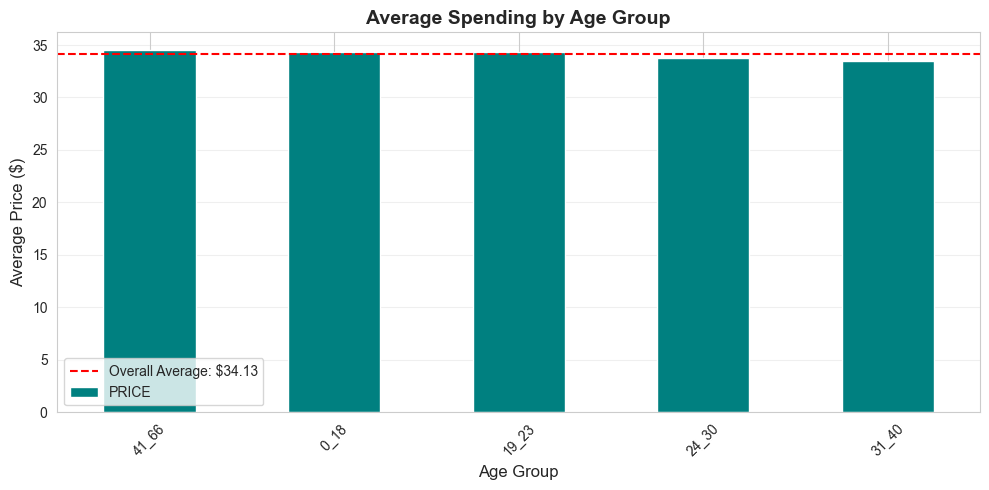

In [30]:
# Visualization
plt.figure(figsize=(10, 5))
age_avg.plot(kind='bar', color='teal')
plt.title('Average Spending by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=df['PRICE'].mean(), color='red', linestyle='--', label=f'Overall Average: ${df["PRICE"].mean():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Finding:**  The 41-66 age group spends the most ($34.48), followed closely by 0-18 ($34.34). Surprisingly, the 31-40 age group spends the least ($33.51). All age groups are within 1 USD of each other.

---
# TASK 6: Create Customer Personas

Combining demographics into unique customer identifiers.

In [32]:
# Create persona labels (Method 1 - List comprehension)
agg_df['customers_level_based'] = [
    '_'.join([str(val) for val in row]).upper()
    for row in agg_df[['COUNTRY', 'SOURCE', 'SEX', 'age_cat']].values
]

print("Personas created!")
print("\nSample personas:")
print(agg_df[['customers_level_based', 'PRICE']].head(10))

Personas created!

Sample personas:
      customers_level_based  PRICE
0    USA_ANDROID_MALE_31_40  59.00
1    BRA_ANDROID_MALE_41_66  59.00
2  FRA_ANDROID_FEMALE_24_30  59.00
3        USA_IOS_MALE_31_40  54.00
4  DEU_ANDROID_FEMALE_31_40  49.00
5  DEU_ANDROID_FEMALE_41_66  49.00
6        FRA_IOS_MALE_19_23  49.00
7  USA_ANDROID_FEMALE_41_66  49.00
8        DEU_IOS_MALE_19_23  49.00
9        USA_IOS_MALE_41_66  46.50


In [33]:
# Check for duplicates
print(f"\nTotal rows before grouping: {len(agg_df)}")
print(f"Unique personas: {agg_df['customers_level_based'].nunique()}")
print("\nDuplicate check:")
print(agg_df['customers_level_based'].value_counts().head())


Total rows before grouping: 348
Unique personas: 109

Duplicate check:
customers_level_based
BRA_ANDROID_FEMALE_24_30    7
BRA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_41_66      7
USA_ANDROID_MALE_24_30      7
USA_IOS_FEMALE_24_30        7
Name: count, dtype: int64


In [34]:
# Group by persona and get average price
agg_df = agg_df.groupby('customers_level_based').agg({'PRICE': 'mean'})
agg_df = agg_df.reset_index()

print(f"\nFinal persona count: {len(agg_df)}")
print("\nFinal persona dataset:")
print(agg_df.head(10))


Final persona count: 109

Final persona dataset:
      customers_level_based  PRICE
0   BRA_ANDROID_FEMALE_0_18  35.65
1  BRA_ANDROID_FEMALE_19_23  34.08
2  BRA_ANDROID_FEMALE_24_30  33.86
3  BRA_ANDROID_FEMALE_31_40  34.90
4  BRA_ANDROID_FEMALE_41_66  36.74
5     BRA_ANDROID_MALE_0_18  34.81
6    BRA_ANDROID_MALE_19_23  31.67
7    BRA_ANDROID_MALE_24_30  33.41
8    BRA_ANDROID_MALE_31_40  34.33
9    BRA_ANDROID_MALE_41_66  40.04


In [37]:
# Verify - each persona should appear only once
print("\nVerification - personas should be unique:")
print(agg_df['customers_level_based'].value_counts().head())
print(f"Unique check: {agg_df['customers_level_based'].value_counts().max()} (should be 1)")


Verification - personas should be unique:
customers_level_based
BRA_ANDROID_FEMALE_0_18     1
BRA_ANDROID_FEMALE_19_23    1
BRA_ANDROID_FEMALE_24_30    1
BRA_ANDROID_FEMALE_31_40    1
BRA_ANDROID_FEMALE_41_66    1
Name: count, dtype: int64
Unique check: 1 (should be 1)


**Finding:** We now have 109 unique customer personas, each representing a specific combination of country, platform, gender, and age group.

---
# TASK 7: Segment Personas by Revenue

Creating 4 segments based on spending levels.

In [36]:
# Create segments using quartiles
agg_df['SEGMENT'] = pd.qcut(agg_df['PRICE'], q=4, labels=['D', 'C', 'B', 'A'])

print("Segments created!")
print("\nSegment distribution:")
print(agg_df['SEGMENT'].value_counts().sort_index())

Segments created!

Segment distribution:
SEGMENT
D    28
C    27
B    27
A    27
Name: count, dtype: int64


In [38]:
# Analyze each segment
print("\nDetailed segment analysis:")
segment_summary = agg_df.groupby('SEGMENT', observed=True).agg({
    'PRICE': ['count', 'mean', 'min', 'max', 'std']
}).round(2)
print(segment_summary)


Detailed segment analysis:
        PRICE                       
        count  mean   min   max  std
SEGMENT                             
D          28 29.21 19.00 32.33 3.64
C          27 33.51 32.50 34.08 0.49
B          27 35.00 34.10 36.00 0.64
A          27 38.69 36.06 45.43 2.58


In [39]:
# Show sample personas from each segment
print("\nSample personas from each segment:")
for segment in ['A', 'B', 'C', 'D']:
    print(f"\n{segment} Segment (Top 3):")
    print(agg_df[agg_df['SEGMENT'] == segment][['customers_level_based', 'PRICE']].head(3))


Sample personas from each segment:

A Segment (Top 3):
       customers_level_based  PRICE
4   BRA_ANDROID_FEMALE_41_66  36.74
9     BRA_ANDROID_MALE_41_66  40.04
11      BRA_IOS_FEMALE_19_23  36.40

B Segment (Top 3):
      customers_level_based  PRICE
0   BRA_ANDROID_FEMALE_0_18  35.65
3  BRA_ANDROID_FEMALE_31_40  34.90
5     BRA_ANDROID_MALE_0_18  34.81

C Segment (Top 3):
      customers_level_based  PRICE
1  BRA_ANDROID_FEMALE_19_23  34.08
2  BRA_ANDROID_FEMALE_24_30  33.86
7    BRA_ANDROID_MALE_24_30  33.41

D Segment (Top 3):
     customers_level_based  PRICE
6   BRA_ANDROID_MALE_19_23  31.67
13    BRA_IOS_FEMALE_31_40  29.88
18      BRA_IOS_MALE_31_40  31.57


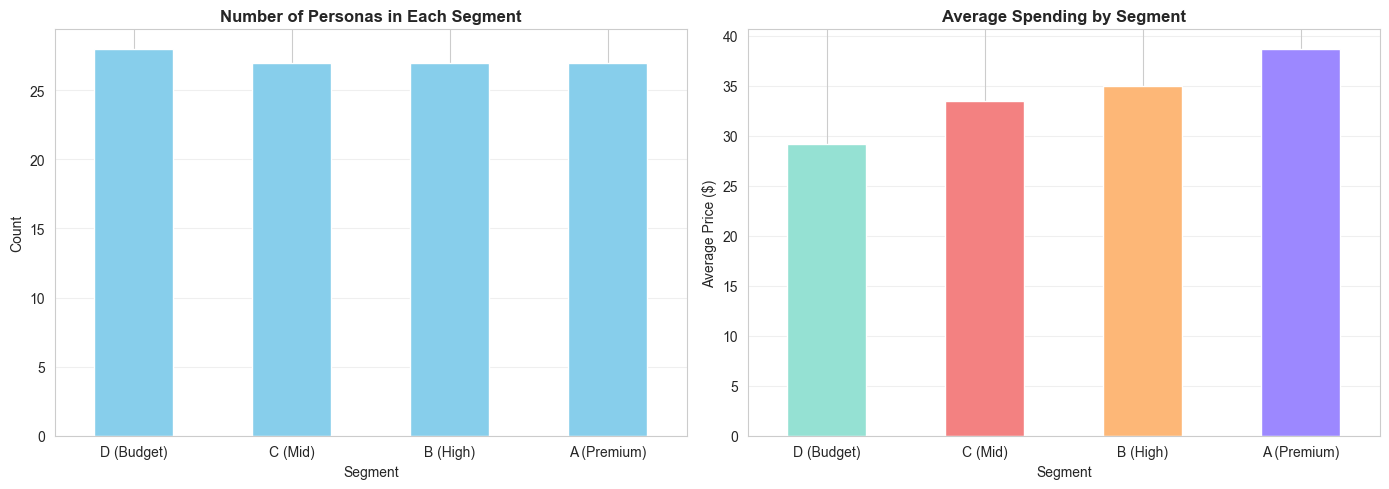

In [40]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Segment distribution
agg_df['SEGMENT'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Personas in Each Segment', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['D (Budget)', 'C (Mid)', 'B (High)', 'A (Premium)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Average spending by segment
segment_avg = agg_df.groupby('SEGMENT', observed=True)['PRICE'].mean().sort_index()
segment_avg.plot(kind='bar', ax=axes[1], color=['#95E1D3', '#F38181', '#FDB777', '#9C88FF'])
axes[1].set_title('Average Spending by Segment', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Average Price ($)')
axes[1].set_xticklabels(['D (Budget)', 'C (Mid)', 'B (High)', 'A (Premium)'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Segment Descriptions

**Segment A - Premium Customers ($36.06 - $45.43)**
- Highest spending group with average of $38.69
- 27 personas in this segment
- These are the most valuable customers

**Strategy:** VIP programs, exclusive content, early access to new features

---

**Segment B - High-Value Customers ($34.10 - $36.00)**
- Average spending: $35.00
- 27 personas in this segment
- Strong potential to upgrade to Segment A

**Strategy:** Loyalty rewards, upselling campaigns, premium feature trials

---

**Segment C - Mid-Value Customers ($32.50 - $34.08)**
- Average spending: $33.51
- 27 personas in this segment
- Moderate engagement level

**Strategy:** Email marketing, time-limited offers, bundle deals

---

**Segment D - Budget Customers ($19.00 - $32.33)**
- Average spending: $29.21
- 28 personas in this segment
- Price-sensitive customers

**Strategy:** Discounts, volume deals, micro-transactions, first purchase bonus

---
# TASK 8: Predict Revenue for New Customers

Using our personas to make revenue predictions.

### Example 1: 33-year-old Turkish woman using Android

In [41]:
# Create persona code
new_user = 'TUR_ANDROID_FEMALE_31_40'

# Find prediction
result = agg_df[agg_df['customers_level_based'] == new_user]

if len(result) > 0:
    print(f"Customer Profile: 33-year-old Turkish woman using Android")
    print(f"Persona Code: {new_user}")
    print(f"Expected Revenue: ${result.iloc[0]['PRICE']:.2f}")
    print(f"Segment: {result.iloc[0]['SEGMENT']}")
    print(f"\nRecommendation:")
    
    segment = result.iloc[0]['SEGMENT']
    if segment == 'A':
        print("→ Premium customer! Offer VIP treatment and exclusive features.")
    elif segment == 'B':
        print("→ High-value customer! Use upselling campaigns to move to Segment A.")
    elif segment == 'C':
        print("→ Mid-value customer! Focus on engagement with value packages.")
    else:
        print("→ Budget customer! Offer discounts and volume deals.")
else:
    print("Persona not found in database")

Customer Profile: 33-year-old Turkish woman using Android
Persona Code: TUR_ANDROID_FEMALE_31_40
Expected Revenue: $41.83
Segment: A

Recommendation:
→ Premium customer! Offer VIP treatment and exclusive features.


**Result:**
- Persona: TUR_ANDROID_FEMALE_31_40
- Expected Revenue: $41.83
- Segment: A (Premium)
- Recommendation: Offer VIP treatment and exclusive features

### Example 2: 35-year-old French woman using iOS

In [42]:
# Create persona code
new_user = 'FRA_IOS_FEMALE_31_40'

# Find prediction
result = agg_df[agg_df['customers_level_based'] == new_user]

if len(result) > 0:
    print(f"Customer Profile: 35-year-old French woman using iOS")
    print(f"Persona Code: {new_user}")
    print(f"Expected Revenue: ${result.iloc[0]['PRICE']:.2f}")
    print(f"Segment: {result.iloc[0]['SEGMENT']}")
    print(f"\nRecommendation:")
    
    segment = result.iloc[0]['SEGMENT']
    if segment == 'A':
        print("→ Premium customer! Offer VIP treatment and exclusive features.")
    elif segment == 'B':
        print("→ High-value customer! Use upselling campaigns to move to Segment A.")
    elif segment == 'C':
        print("→ Mid-value customer! Focus on engagement with value packages.")
    else:
        print("→ Budget customer! Offer discounts and volume deals.")
else:
    print("Persona not found in database")

Customer Profile: 35-year-old French woman using iOS
Persona Code: FRA_IOS_FEMALE_31_40
Expected Revenue: $32.82
Segment: C

Recommendation:
→ Mid-value customer! Focus on engagement with value packages.


**Result:**
- Persona: FRA_IOS_FEMALE_31_40
- Expected Revenue: $32.82
- Segment: C (Mid-value)
- Recommendation: Focus on engagement with value packages

---
# Summary of Key Findings

## 1. Platform Insights
- **Android** has 59.5% of transactions (2,974) vs iOS 40.5% (2,026)
- **Platforms spend nearly the same:** Android 34.17 USD vs iOS 34.07 USD (only 0.3% difference)
- Both platforms are equally valuable - no premium pricing needed for either

## 2. Age Group Insights
- **41-66 age group spends the most** (34.48 USD average) - surprising finding!
- **0-18 age group** is second (34.34 USD average) - young users are valuable
- **19-23 age group** third (34.31 USD average)
- **31-40 age group spends the least** (33.51 USD average) - interesting pattern
- All age groups within $1 of each other

## 3. Country Insights
- **Turkey leads in average spending** (34.79 USD)
- **All countries show similar patterns** (within 1.20 USD range)
- **USA has most transactions** (41.3%) but not highest average
- **No need for country-specific pricing** - standard pricing works globally

## 4. Customer Segments
- **109 unique personas** created from demographic combinations
- **4 segments** with clear spending differences:
  - Segment A (Premium): 36-45 USD average
  - Segment B (High-value): 34-36 USD average
  - Segment C (Mid-value): 32-34 USD average
  - Segment D (Budget): 19-32 USD average

## 5. Business Recommendations

### Platform Strategy:
- **Treat both platforms equally** - spending difference is negligible (0.3%)
- Focus on user experience improvements for both
- Platform-specific features based on usage patterns, not revenue
- Marketing budget proportional to user base (60% Android, 40% iOS)

In [ ]:
# Save final results
agg_df.to_csv('customer_segments.csv', index=False)
print("\nAnalysis complete!")
print("Results saved to 'customer_segments.csv'")